In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

# Problem 1

In [72]:
df=pd.read_csv('cubic_zirconia.csv')

In [73]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [75]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [76]:
df['price/wt']=df['price']/df['carat']
print(df.groupby('cut')['price/wt'].mean().sort_values())
print(df.groupby('color')['price/wt'].mean().sort_values())
print(df.groupby('clarity')['price/wt'].mean().sort_values())
df = df.drop(['price/wt','table'], axis=1)

cut
Fair         3864.992015
Good         3874.299234
Ideal        3902.342382
Very Good    4016.721192
Premium      4203.418775
Name: price/wt, dtype: float64
color
E    3794.103868
J    3813.436594
D    3942.903253
H    3997.482889
I    4007.715186
F    4114.355648
G    4168.939350
Name: price/wt, dtype: float64
clarity
I1      2792.892343
VVS1    3822.162783
SI1     3848.997653
SI2     4011.965289
VS2     4085.038618
VS1     4143.222750
VVS2    4184.272455
IF      4189.653971
Name: price/wt, dtype: float64


In [77]:
df['cut'] = df['cut'].replace({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
df['color']=df['color'].replace({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
df['clarity']=df['clarity'].replace({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,x,y,z,price
0,1,0.30,1,1,7,62.1,4.27,4.29,2.66,499
1,2,0.33,5,4,2,60.8,4.42,4.46,2.70,984
2,3,0.90,3,1,3,62.2,6.04,6.12,3.78,6289
3,4,0.42,1,3,4,61.6,4.82,4.80,2.96,1082
4,5,0.31,1,3,1,60.4,4.35,4.43,2.65,779


In [78]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [79]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
x            0
y            0
z            0
price        0
dtype: int64

In [80]:
print('rows     : ', df.shape[0])
print('columns  : ', df.shape[1])
print('\nFeatures : \n' , df.columns.tolist())
print('\nMissing values : ', df.isnull().any())
print('\nUnique values : \n', df.nunique())

rows     :  26967
columns  :  9

Features : 
 ['carat', 'cut', 'color', 'clarity', 'depth', 'x', 'y', 'z', 'price']

Missing values :  carat      False
cut        False
color      False
clarity    False
depth       True
x          False
y          False
z          False
price      False
dtype: bool

Unique values : 
 carat       257
cut           5
color         7
clarity       8
depth       169
x           531
y           526
z           356
price      8742
dtype: int64


In [81]:
df[df.isna().any(axis=1)]

,carat,cut,color,clarity,depth,x,y,z,price
26,0.34,1,2,7,NaN,4.50,4.44,2.74,803
86,0.74,1,1,8,NaN,5.92,5.97,3.52,2501
117,1.00,5,3,7,NaN,6.40,6.36,4.00,5292
148,1.11,5,1,8,NaN,6.66,6.61,4.09,4177
163,1.00,3,3,6,NaN,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...
26848,1.22,3,5,4,NaN,6.91,6.85,4.29,7673
26854,1.29,5,6,6,NaN,7.12,7.03,4.27,6321
26879,0.51,3,1,7,NaN,5.10,5.13,3.12,1343
26923,0.51,1,2,6,NaN,5.12,5.09,3.18,1882


In [82]:
df[df['x']==0]

,carat,cut,color,clarity,depth,x,y,z,price
5821,0.71,2,3,8,64.1,0.0,0.0,0.0,2130
6215,0.71,2,3,8,64.1,0.0,0.0,0.0,2130
17506,1.14,4,4,4,57.5,0.0,0.0,0.0,6381


In [83]:
df[df['y']==0]

,carat,cut,color,clarity,depth,x,y,z,price
5821,0.71,2,3,8,64.1,0.0,0.0,0.0,2130
6215,0.71,2,3,8,64.1,0.0,0.0,0.0,2130
17506,1.14,4,4,4,57.5,0.0,0.0,0.0,6381


In [84]:
df[df['z']==0]

,carat,cut,color,clarity,depth,x,y,z,price
5821,0.71,2,3,8,64.1,0.00,0.00,0.0,2130
6034,2.02,5,5,6,62.7,8.02,7.95,0.0,18207
6215,0.71,2,3,8,64.1,0.00,0.00,0.0,2130
10827,2.20,5,5,7,61.2,8.42,8.37,0.0,17265
12498,2.18,5,5,8,59.4,8.49,8.45,0.0,12631
12689,1.10,5,4,8,63.0,6.50,6.47,0.0,3696
17506,1.14,4,4,4,57.5,0.00,0.00,0.0,6381
18194,1.01,5,5,5,58.1,6.66,6.60,0.0,3167
23758,1.12,5,4,5,60.4,6.71,6.67,0.0,2383


In [85]:
df['x'] = df['x'].replace(0, np.nan)
df['y'] = df['y'].replace(0, np.nan)
df['z'] = df['z'].replace(0, np.nan)

In [86]:
df.describe(include='all')

,carat,cut,color,clarity,depth,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26270.000000,26964.000000,26964.000000,26958.000000,26967.000000
mean,0.798375,2.647940,3.547781,5.510735,61.745147,5.730491,5.734207,3.539238,3939.518115
std,0.477745,1.619656,1.775589,2.093727,1.412860,1.126959,1.164553,0.717838,4024.864666
min,0.200000,1.000000,1.000000,1.000000,50.800000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,1.000000,2.000000,4.000000,61.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,3.000000,4.000000,6.000000,61.800000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,5.000000,5.000000,7.000000,62.500000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,5.000000,7.000000,8.000000,73.600000,10.230000,58.900000,31.800000,18818.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26270 non-null  float64
 5   x        26964 non-null  float64
 6   y        26964 non-null  float64
 7   z        26958 non-null  float64
 8   price    26967 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.9 MB


In [88]:
df['x'] = df['x'].fillna((df['x'].median()))
df['y'] = df['y'].fillna((df['y'].median()))
df['z'] = df['z'].fillna((df['z'].median()))
df['depth'] = df['depth'].fillna((df['depth'].median()))

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26967 non-null  float64
 5   x        26967 non-null  float64
 6   y        26967 non-null  float64
 7   z        26967 non-null  float64
 8   price    26967 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.9 MB


In [90]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 71


In [91]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 9)
After (26896, 9)


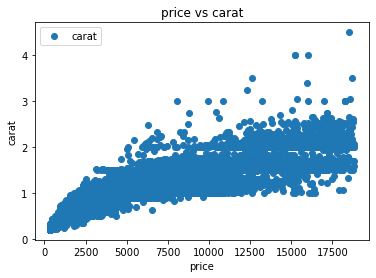

In [92]:
df.plot(x='price', y='carat', style='o')
plt.title('price vs carat')
plt.xlabel('price')
plt.ylabel('carat')
plt.show()

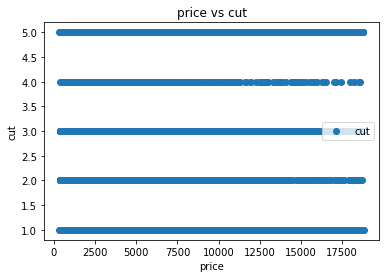

In [93]:
df.plot(x='price', y='cut', style='o')
plt.title('price vs cut')
plt.xlabel('price')
plt.ylabel('cut')
plt.show()

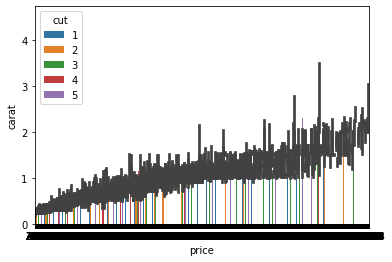

In [94]:
sns.barplot(x='price', y='carat', data=df, hue='cut')

In [95]:
df.skew(axis = 0, skipna = True) 

carat      1.113546
cut        0.373405
color      0.124751
clarity   -0.681843
depth     -0.028920
x          0.400449
y          3.890279
z          2.641933
price      1.617446
dtype: float64

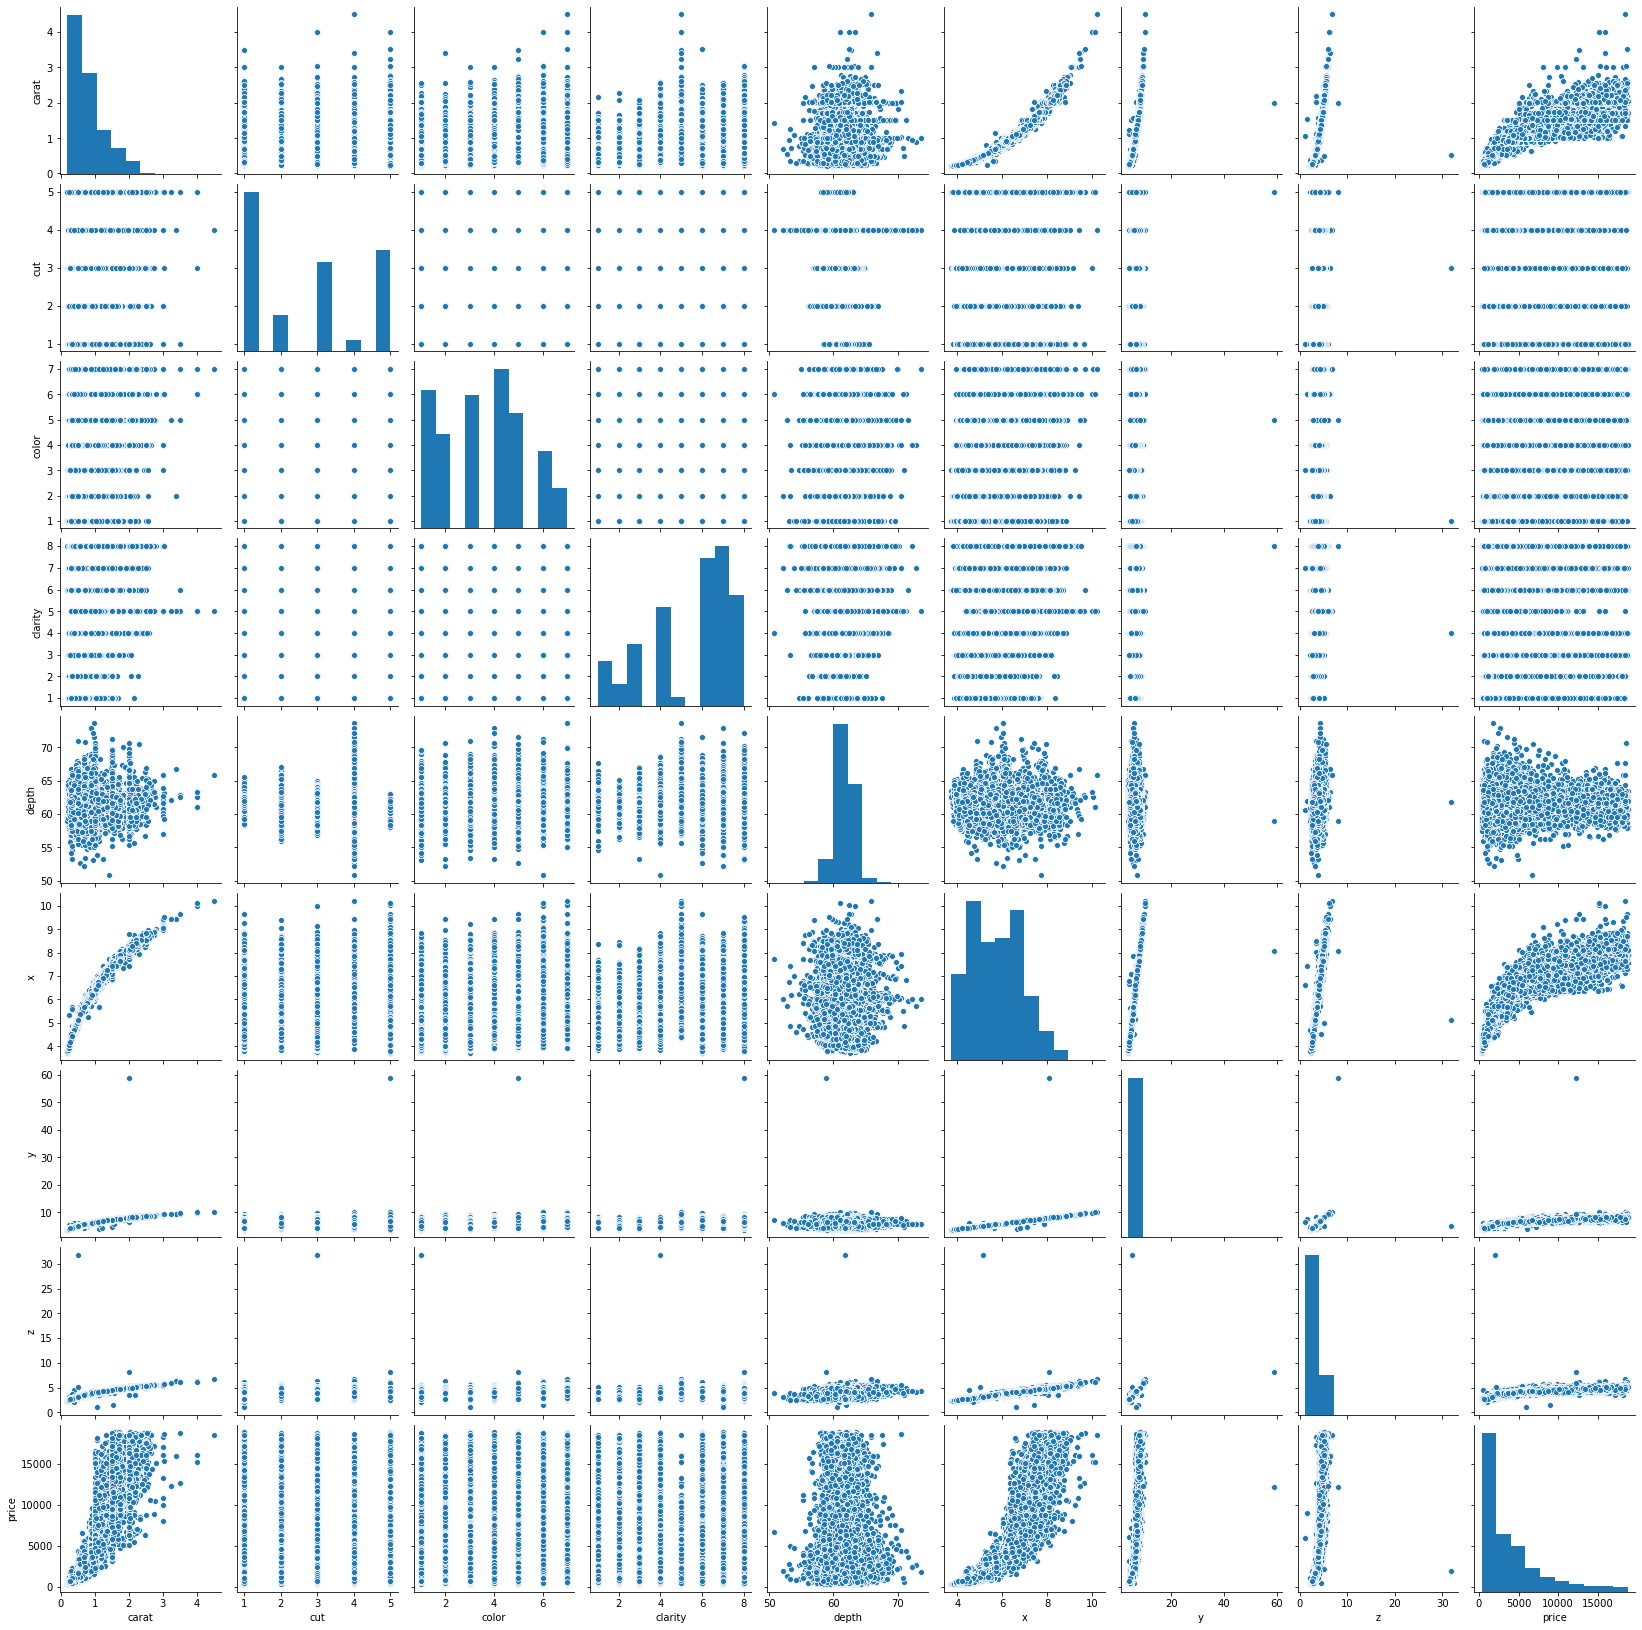

In [96]:
sns.pairplot(df)

In [97]:
df.corr()

,carat,cut,color,clarity,depth,x,y,z,price
carat,1.000000,0.163331,0.292358,0.323852,0.034989,0.977885,0.942320,0.946258,0.922364
cut,0.163331,1.000000,0.037576,0.163369,-0.088389,0.169803,0.151531,0.147393,0.109529
color,0.292358,0.037576,1.000000,-0.016162,0.052632,0.273501,0.263611,0.267525,0.174869
clarity,0.323852,0.163369,-0.016162,1.000000,0.050207,0.348798,0.333052,0.338678,0.151057
depth,0.034989,-0.088389,0.052632,0.050207,1.000000,-0.018184,-0.024187,0.097383,-0.002675
x,0.977885,0.169803,0.273501,0.348798,-0.018184,1.000000,0.962471,0.960622,0.887400
y,0.942320,0.151531,0.263611,0.333052,-0.024187,0.962471,1.000000,0.932587,0.857160
z,0.946258,0.147393,0.267525,0.338678,0.097383,0.960622,0.932587,1.000000,0.855222
price,0.922364,0.109529,0.174869,0.151057,-0.002675,0.887400,0.857160,0.855222,1.000000


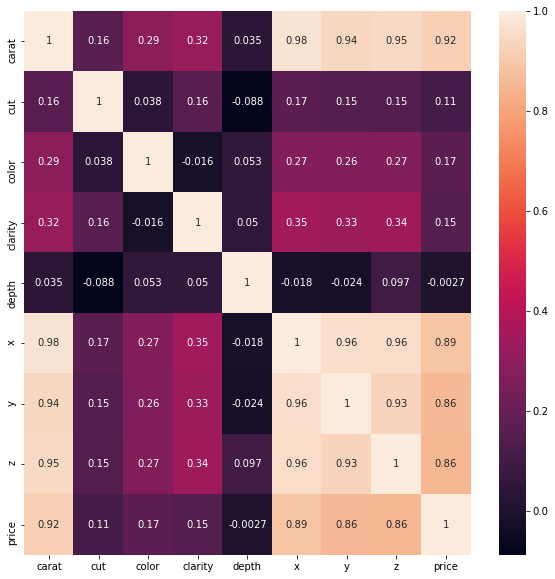

In [98]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

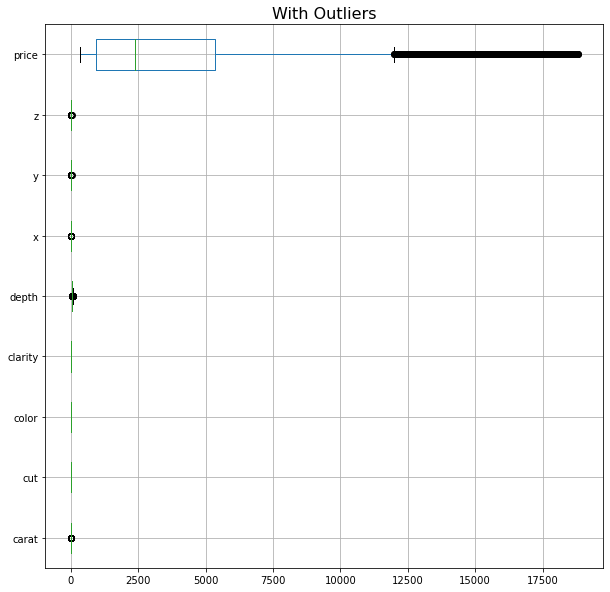

In [99]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)

In [100]:
   def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [101]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

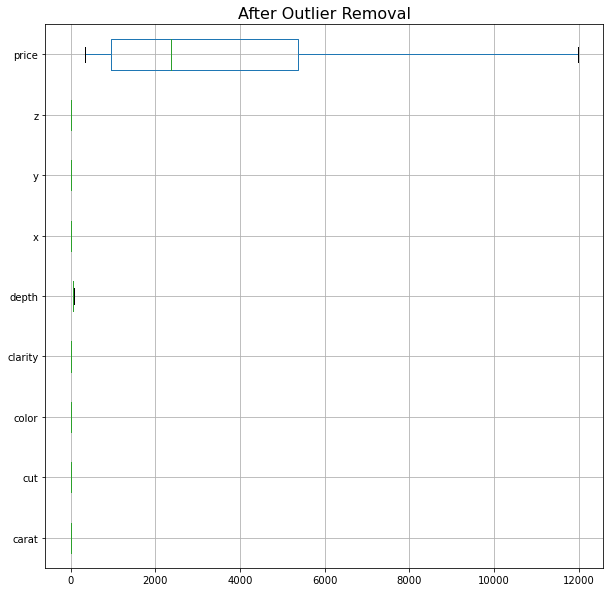

In [102]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)

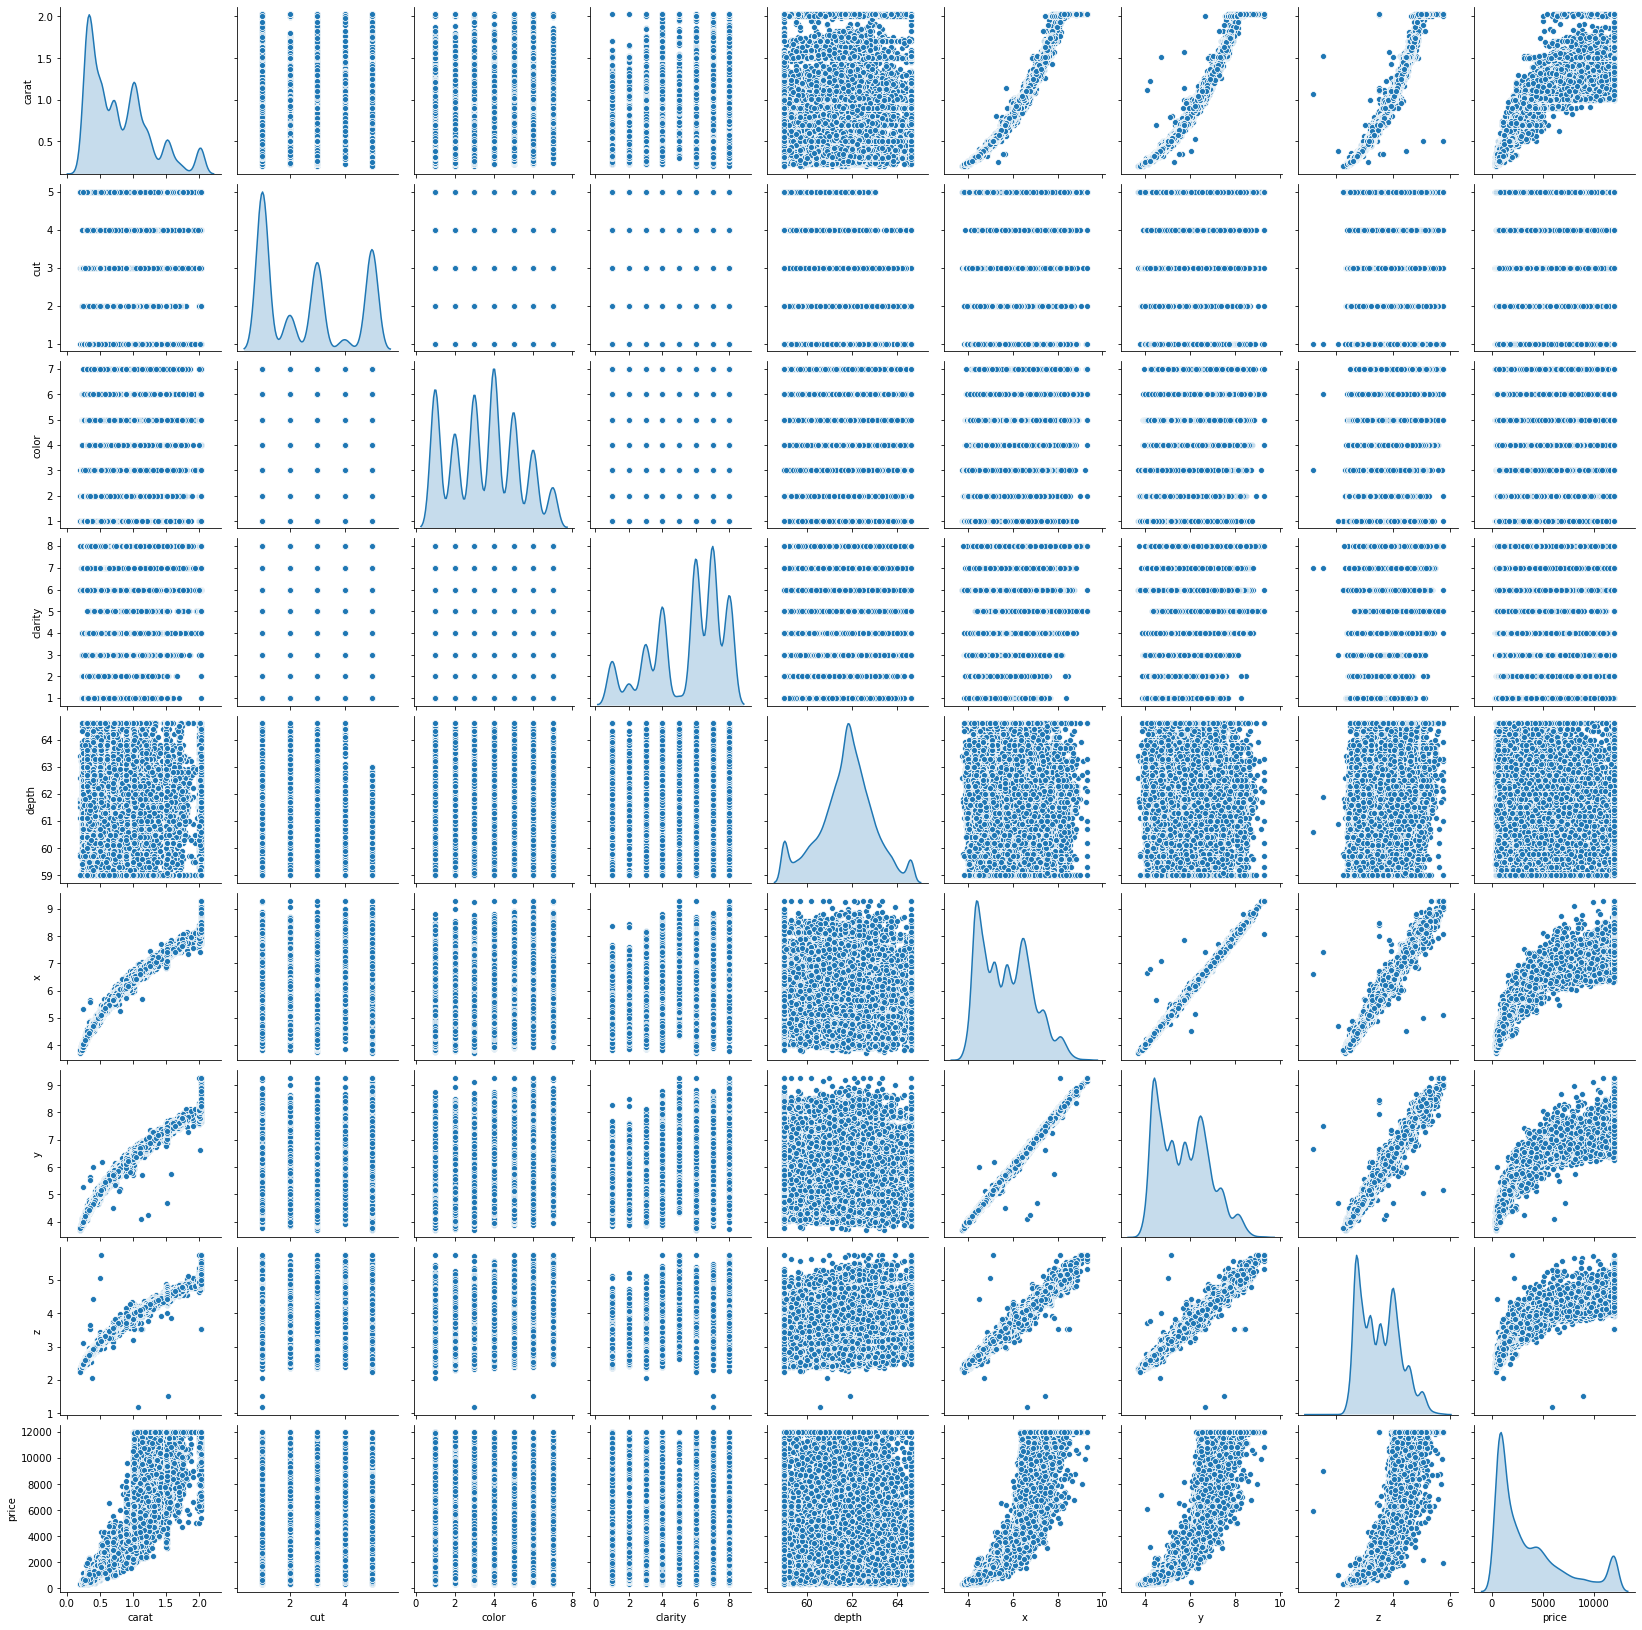

In [103]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  

In [104]:
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [105]:
X.head()

,carat,cut,color,clarity,depth,x,y,z
0,0.30,1.0,1.0,7.0,62.1,4.27,4.29,2.66
1,0.33,5.0,4.0,2.0,60.8,4.42,4.46,2.70
2,0.90,3.0,1.0,3.0,62.2,6.04,6.12,3.78
3,0.42,1.0,3.0,4.0,61.6,4.82,4.80,2.96
4,0.31,1.0,3.0,1.0,60.4,4.35,4.43,2.65


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [108]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [109]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8843.952740384999
The coefficient for cut is -33.87281216902954
The coefficient for color is -238.8962681224463
The coefficient for clarity is -287.81100862266305
The coefficient for depth is 4.661998676825442
The coefficient for x is -1578.414020899397
The coefficient for y is 1761.1694106617674
The coefficient for z is -1012.9136380438798


In [110]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1489.0053873784418


In [111]:
regression_model.score(X_train, y_train)

0.9180957346037073

In [112]:
regression_model.score(X_test, y_test)

0.9180313781719153

In [114]:
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

993.3075674712472

In [115]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

993.9617614858037

In [116]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,x,y,z,price
23823,0.760,5.0,1.0,8.0,62.4,5.83,5.86,3.65,2451.00
23560,0.400,1.0,1.0,4.0,62.2,4.76,4.72,2.95,1125.00
26030,0.410,3.0,1.0,4.0,62.8,4.72,4.77,2.98,834.00
21732,2.025,1.0,7.0,4.0,60.9,8.35,8.39,5.10,11986.25
5075,0.400,3.0,6.0,4.0,63.5,4.71,4.67,2.98,882.00


In [119]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+x+y+z', data = data_train).fit()
lm1.params

Intercept    1489.005387
carat        8843.952740
cut           -33.872812
color        -238.896268
clarity      -287.811009
depth           4.661999
x           -1578.414021
y            1761.169411
z           -1012.913638
dtype: float64

In [120]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 2.637e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        02:01:30   Log-Likelihood:            -1.5664e+05
No. Observations:               18827   AIC:                         3.133e+05
Df Residuals:                   18818   BIC:                         3.134e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1489.0054    775.610      1.920      0.0

In [121]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [122]:
import math

math.sqrt(mse)

993.9617614858032

In [123]:
regression_model.score(X_test, y_test)

0.9180313781719153

In [124]:
y_pred = regression_model.predict(X_test)

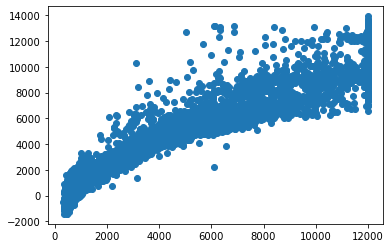

In [126]:
plt.scatter(y_test['price'], y_pred)

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [130]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 119.92497545372572
cut ---> 4.132836044496591
color ---> 5.559439494261386
clarity ---> 9.410336166107859
depth ---> 359.248399748276
x ---> 10490.302112062953
y ---> 9840.526260433091
z ---> 1990.613879732765


In [131]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [132]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [133]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1761472137488607
The coefficient for cut is -0.01579551937560617
The coefficient for color is -0.12224629848755669
The coefficient for clarity is -0.17373974560268518
The coefficient for depth is 0.0016316922668727844
The coefficient for x is -0.5113111140194104
The coefficient for y is 0.5665995907399008
The coefficient for z is -0.20278929605943705


In [135]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.7337114337379686e-16


In [136]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9180343416984617

In [137]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [138]:
import math

math.sqrt(mse)

0.2862964517795122

In [139]:
y_pred = regression_model.predict(X_test_scaled)

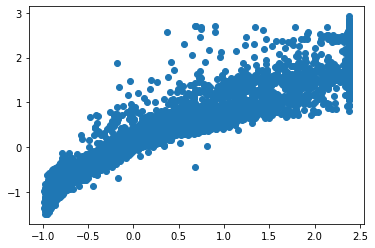

In [140]:
plt.scatter(y_test_scaled['price'], y_pred)

In [141]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(1489.01) * Intercept + (8843.95) * carat + (-33.87) * cut + (-238.9) * color + (-287.81) * clarity + (4.66) * depth + (-1578.41) * x + (1761.17) * y + (-1012.91) * z + 

# Problem 2

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [208]:
dg=pd.read_csv('Holiday_Package.csv')

In [209]:
dg.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [210]:
dg.drop('Unnamed: 0', axis=1, inplace= True)

In [211]:
dg.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [212]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [213]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
x          0
y          0
z          0
price      0
dtype: int64

In [214]:
print('rows     : ', dg.shape[0])
print('columns  : ', dg.shape[1])
print('\nFeatures : \n' , dg.columns.tolist())
print('\nMissing values : ', dg.isnull().any())
print('\nUnique values : \n', dg.nunique())

rows     :  872
columns  :  7

Features : 
 ['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children', 'no_older_children', 'foreign']

Missing values :  Holliday_Package     False
Salary               False
age                  False
educ                 False
no_young_children    False
no_older_children    False
foreign              False
dtype: bool

Unique values : 
 Holliday_Package       2
Salary               864
age                   43
educ                  20
no_young_children      4
no_older_children      7
foreign                2
dtype: int64


In [215]:
for feature in dg.columns: 
    if dg[feature].dtype == 'object': 
        print(feature)
        print(dg[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [216]:
for feature in dg.columns: 
    if dg[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(dg[feature].unique()))
        print(pd.Categorical(dg[feature].unique()).codes)
        dg[feature] = pd.Categorical(dg[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [217]:
dg.Holliday_Package.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

In [218]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [219]:
dg.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,0.459862,47729.172018,39.955275,9.307339,0.311927,0.982798,0.247706
std,0.498672,23418.668531,10.551675,3.036259,0.612870,1.086786,0.431928
min,0.000000,1322.000000,20.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,35324.000000,32.000000,8.000000,0.000000,0.000000,0.000000
50%,0.000000,41903.500000,39.000000,9.000000,0.000000,1.000000,0.000000
75%,1.000000,53469.500000,48.000000,12.000000,0.000000,2.000000,0.000000
max,1.000000,236961.000000,62.000000,21.000000,3.000000,6.000000,1.000000


In [220]:
dg.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [222]:
dup = dg.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


Text(0.5, 1.0, 'With Outliers')

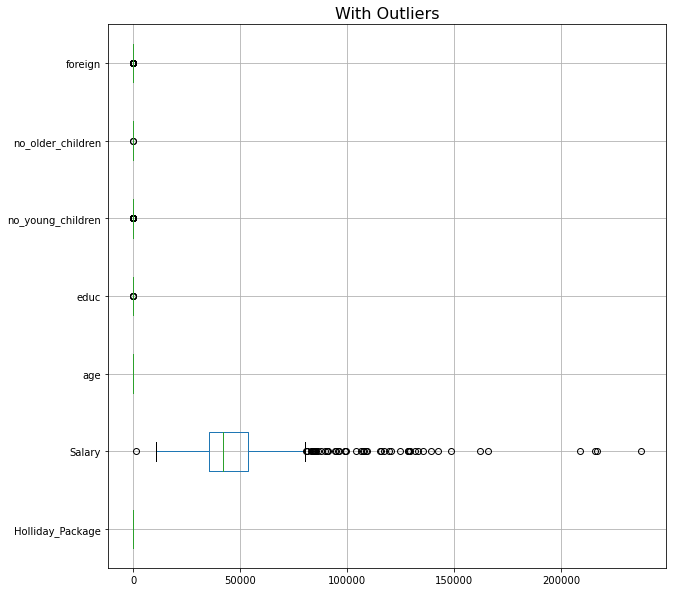

In [223]:
cont=dg.dtypes[(dg.dtypes!='float8') & (dg.dtypes!='float64')].index
plt.figure(figsize=(10,10))
dg[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)

In [224]:
   def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [185]:
for column in dg[cont].columns:
    lr,ur=remove_outlier(dg[column])
    dg[column]=np.where(dg[column]>ur,ur,dg[column])
    dg[column]=np.where(dg[column]<lr,lr,dg[column])

Text(0.5, 1.0, 'After Outlier Removal')

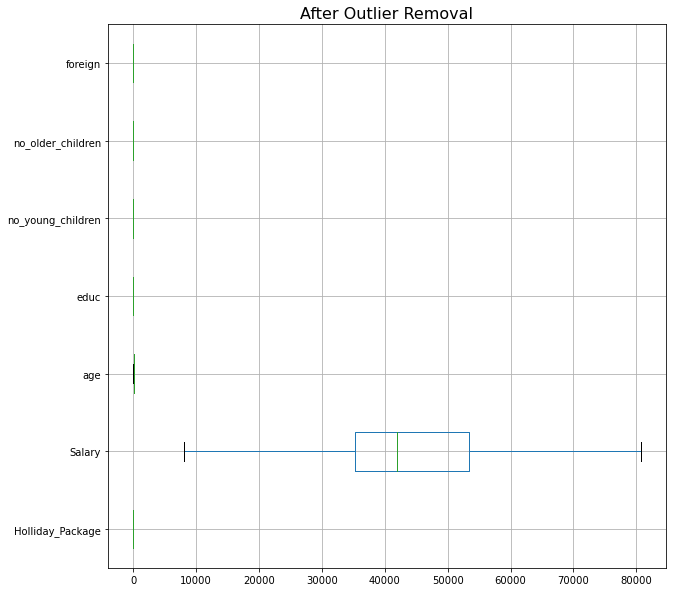

In [186]:
plt.figure(figsize=(10,10))
dg[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)

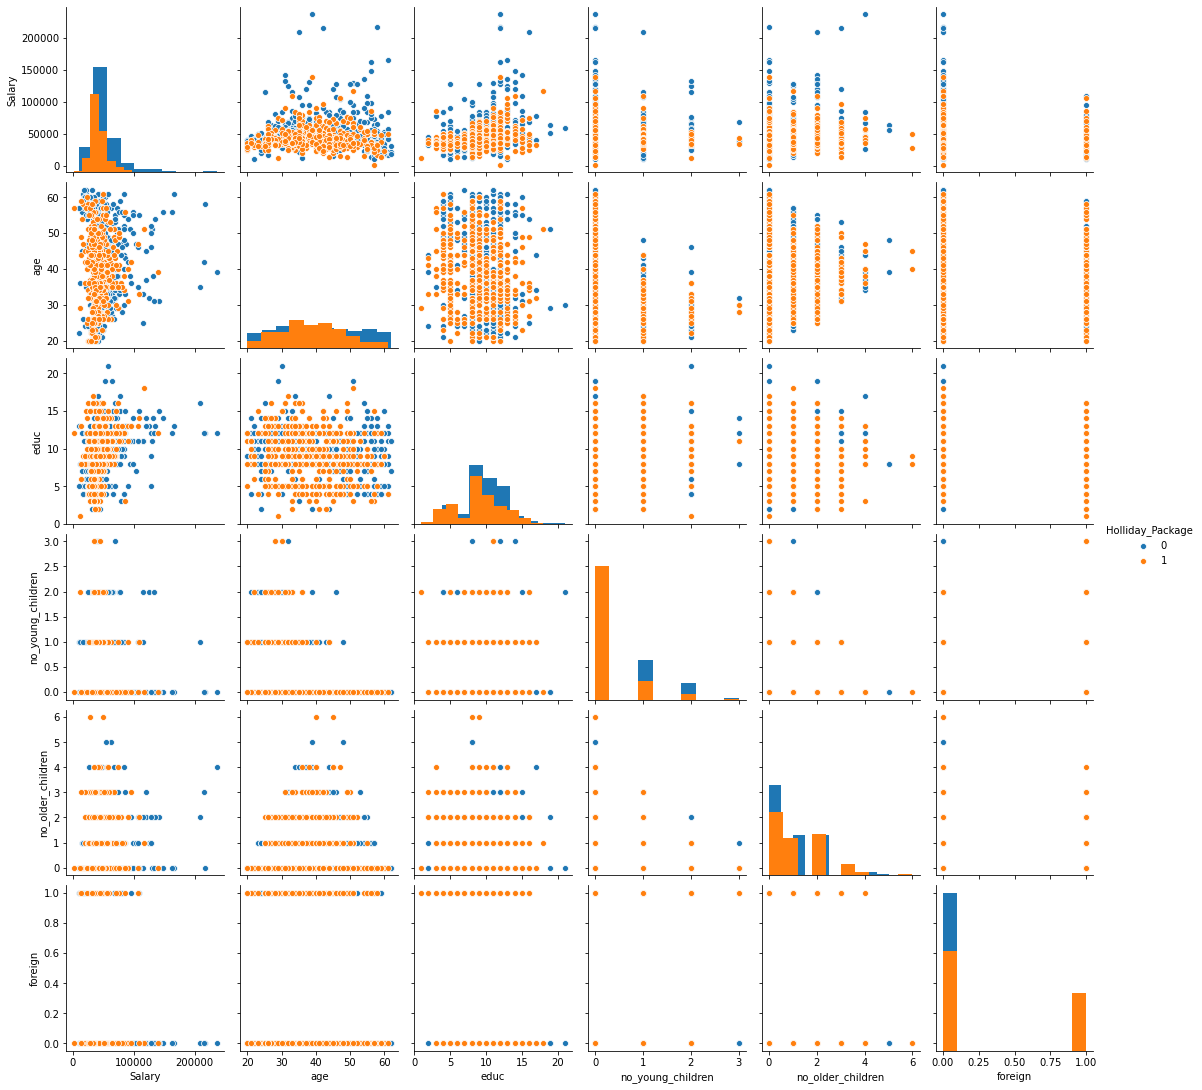

In [239]:
sns.pairplot(dg ,diag_kind='hist' ,hue='Holliday_Package')

In [229]:
dg.corr()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,1.000000,-0.185694,-0.092311,-0.102552,-0.173115,0.080286,0.254096
Salary,-0.185694,1.000000,0.071709,0.326540,-0.029664,0.113772,-0.201043
age,-0.092311,0.071709,1.000000,-0.149294,-0.519093,-0.116205,-0.107148
educ,-0.102552,0.326540,-0.149294,1.000000,0.098350,-0.036321,-0.419678
no_young_children,-0.173115,-0.029664,-0.519093,0.098350,1.000000,-0.238428,0.085111
no_older_children,0.080286,0.113772,-0.116205,-0.036321,-0.238428,1.000000,0.021317
foreign,0.254096,-0.201043,-0.107148,-0.419678,0.085111,0.021317,1.000000


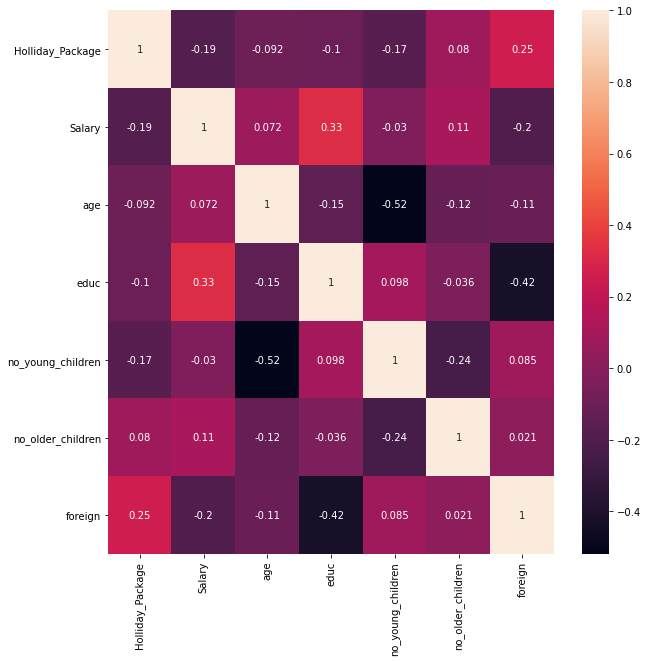

In [230]:
plt.figure(figsize=(10,10))
sns.heatmap(dg.corr(), annot=True)

In [ ]:
dg.skew(axis = 0, skipna = True) 

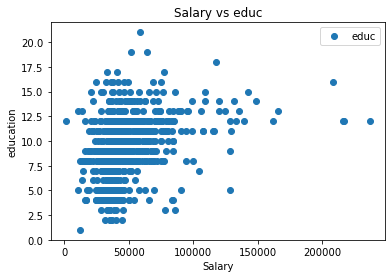

In [235]:
dg.plot(x='Salary', y='educ', style='o')
plt.title('Salary vs educ')
plt.xlabel('Salary')
plt.ylabel('education')
plt.show()

In [ ]:
X = dg.drop('Salary', axis=1)


y = dg[['Salary']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)

In [ ]:
model = LogisticRegression(max_iter=10000, verbose=True)
model.fit(X_train, y_train)

In [ ]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [ ]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

In [ ]:
model.score(X_train, y_train)

In [ ]:
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);